# 6.3.1 라쏘(로지스틱 회귀) 모델

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 데이터 스케일 조정 없는 house-unscaled로 Lasso 실행

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/기말고사 과제/Bike-unscaled.csv')
df.shape


(8751, 47)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8751 entries, 0 to 8750
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature      8751 non-null   float64
 1   Humidity         8751 non-null   float64
 2   Wind speed       8751 non-null   float64
 3   Visibility       8751 non-null   int64  
 4   Solar Radiation  8751 non-null   float64
 5   Rented Bike B    8751 non-null   float64
 6   Functioning Day  8751 non-null   int64  
 7   Holiday          8751 non-null   int64  
 8   Date_1.0         8751 non-null   int64  
 9   Date_2.0         8751 non-null   int64  
 10  Date_3.0         8751 non-null   int64  
 11  Date_4.0         8751 non-null   int64  
 12  Date_5.0         8751 non-null   int64  
 13  Date_6.0         8751 non-null   int64  
 14  Date_7.0         8751 non-null   int64  
 15  Date_8.0         8751 non-null   int64  
 16  Date_9.0         8751 non-null   int64  
 17  Date_10.0     

In [ ]:
 df['Functioning Day'].value_counts()

Functioning Day
1    8456
0     295
Name: count, dtype: int64

In [ ]:
data = df.drop(['Rented Bike B'], axis=1)   # 타겟변수를 제외한 입력변수를 data에 저장
target = df['Rented Bike B']                # 타겟변수만 target에 저장

# 50:50 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=42)   # test_size=0.5임에 주의

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (4375, 46)
X_test shape: (4376, 46)


In [ ]:
# Lasso 모델 (Default 모델 for liblinear)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
ls = LogisticRegression(penalty='l1',solver='liblinear',C=1,random_state=0)
model = ls.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성

print ("Lasso Accuracy on training set:{:.5f}".format(model.score(X_train, y_train)))
print ("Lasso Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Lasso Accuracy on training set:0.90629
Lasso Accuracy on test set:0.90334


In [ ]:
# Lasso 모델 (Default 모델 for liblinear)
ls = LogisticRegression(penalty='l1',solver='liblinear',C=1,random_state=0)

# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
params = {'solver':[ 'liblinear'],
          'C':[0.01,0.05,0.1,0.2,0.3,0.5,1]
         }

# GridSearchCV의 cv=cross_validation 옵션값은 위의 StratifiedKFold의 random_state 옵션값을 적용시켜서
# GridSearchCV를 실행핼 때마다 결과가 항상 동일하게 나오도록 보장
grid_ls = GridSearchCV(ls, param_grid=params, scoring='accuracy', cv=cross_validation,
                       n_jobs=-1, verbose=1)
grid_ls.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_ls.best_score_))
print("GridSearchCV best parameter:", (grid_ls.best_params_))

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV max accuracy:0.90217
GridSearchCV best parameter: {'C': 1, 'solver': 'liblinear'}


In [ ]:
best_clf = grid_ls.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.90334
ROC AUC on test set:0.96727


In [ ]:
print ("Number of features used:", np.sum(best_clf.coef_ != 0))

Number of features used: 43


In [ ]:
# 추가 코딩
print('회귀계수', best_clf.coef_)

회귀계수 [[ 1.48799865e-01 -6.27441607e-02 -1.57873023e-01 -1.00968604e-04
   5.75991138e-01  7.65038321e+00  1.06350606e+00 -5.36546007e-01
   0.00000000e+00  3.34982320e-01 -5.01515030e-01  4.32592562e-01
  -1.00632413e-01  0.00000000e+00 -1.24633230e-01 -3.06237863e-01
   4.48969486e-01  0.00000000e+00  2.76921793e-02 -1.40334256e-01
  -5.18156049e-01 -2.21912603e+00 -5.01192701e+00 -6.33011106e+00
  -6.21203217e+00 -1.72319861e+00 -1.97070635e-01  2.44745652e+00
   2.67395565e-01 -8.00721947e-01 -9.59542310e-01 -1.14358924e+00
  -4.92265084e-01 -1.22732027e+00 -7.06361154e-01 -4.41267042e-01
   4.71414519e-01  1.68798529e+00  9.10658480e-01  6.90060568e-01
   9.93505541e-01  9.59675333e-01  4.29309840e-01 -1.16541053e+00
  -1.10768700e+00 -3.73078083e+00]]


In [ ]:
# 변수명을 Index로 만들고 coefficient값을 매칭한 데이터프레임 만들기

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(best_clf.coef_.transpose(), index=feature_names,
                   columns=['coef'])
dft1 = dft.sort_values(by='coef', ascending=False)   # 컬럼 coef의 값들을 내림차순으로 정리
dft1

,coef
Functioning Day,7.650383
Hour_8.0,2.447457
Hour_18.0,1.687985
Holiday,1.063506
Hour_21.0,0.993506
Hour_22.0,0.959675
Hour_19.0,0.910658
Hour_20.0,0.690061
Solar Radiation,0.575991
Hour_17.0,0.471415


In [ ]:
# Odds ratio 계산

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.exp(best_clf.coef_).transpose(), index=feature_names,
                   columns=['Odds_ratio'])
dft1 = dft.sort_values(by='Odds_ratio', ascending=False)   # 컬럼 coef의 값들을 내림차순으로 정리
dft1

,Odds_ratio
Functioning Day,2101.450732
Hour_8.0,11.558909
Hour_18.0,5.408573
Holiday,2.896509
Hour_21.0,2.700685
Hour_22.0,2.610849
Hour_19.0,2.485959
Hour_20.0,1.993836
Solar Radiation,1.778893
Hour_17.0,1.602259


In [ ]:
# Odds ratio가 1(즉, 원 계수값이 0)인 변수들을 제거
dft2 = dft1[dft1['Odds_ratio']!= 1]
dft2 = dft2[dft2['Odds_ratio']<=100]
#dft2.drop(['Functioning Day'],axis=1,inplace=True)

dft2.shape

(42, 1)

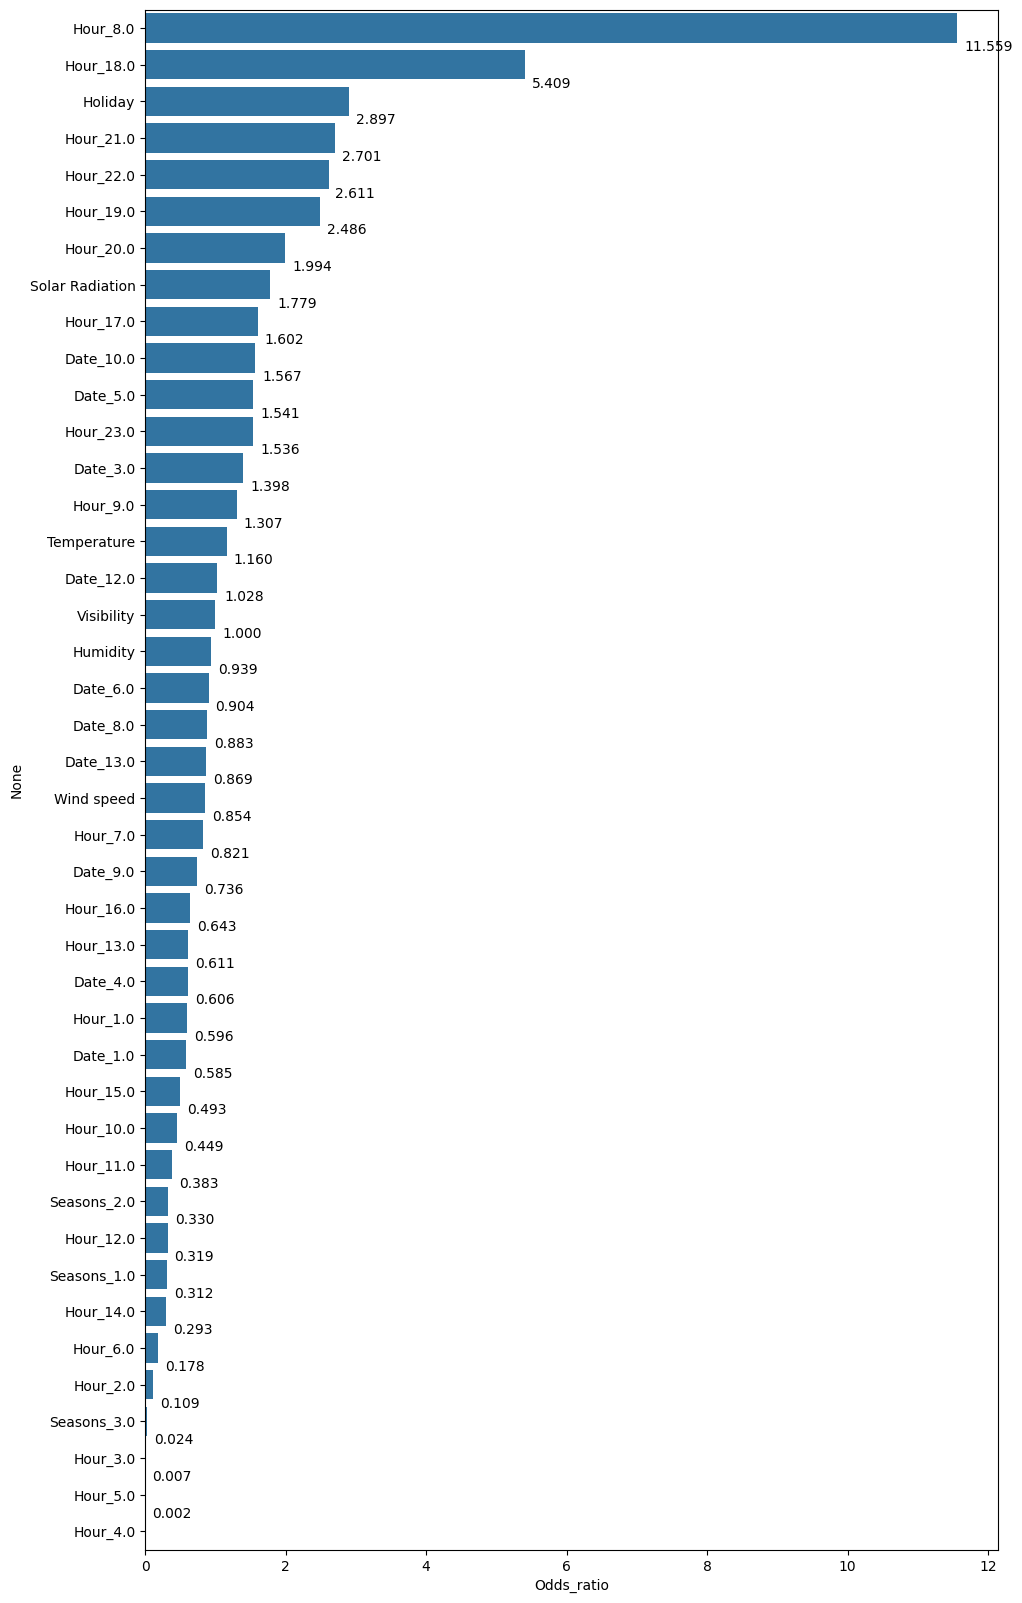

In [ ]:
# 데이터프레임 dft2의 막대그래프 그리기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(11, 20))
ax = sns.barplot(y=dft2.index, x="Odds_ratio", data=dft2)

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+1.4),
                xytext=(5, 10), textcoords='offset points')

# 로그 변환한 데이터로 Lasso 실행 (이하 모두 추가 코딩)

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/기말고사 과제/Bike-log.csv')
df.shape

(8751, 47)

In [ ]:
data = df.drop(['Rented Bike B'], axis=1)   # 타겟변수를 제외한 입력변수를 data에 저장
target = df['Rented Bike B']                # 타겟변수만 target에 저장

# 50:50 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=42)   # test_size=0.5임에 주의

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (4375, 46)
X_test shape: (4376, 46)


In [ ]:
# Lasso 모델 (Default 모델 for liblinear)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
ls = LogisticRegression(penalty='l1',solver='liblinear',C=1,random_state=0)
model = ls.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성
accuracy = accuracy_score(y_test, pred)

print ("Lasso Accuracy on training set:{:.5f}".format(model.score(X_train, y_train)))
print ("Lasso Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Lasso Accuracy on training set:0.89851
Lasso Accuracy on test set:0.89922


In [ ]:
# Lasso 모델 (Default 모델 for liblinear)
ls = LogisticRegression(penalty='l1',solver='liblinear',C=1,random_state=0)

# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
params = {'solver':[ 'liblinear'],
          'C':[0.01,0.05,0.1,0.2,0.3,0.5,1]
         }

# GridSearchCV의 cv=cross_validation 옵션값은 위의 StratifiedKFold의 random_state 옵션값을 적용시켜서
# GridSearchCV를 실행핼 때마다 결과가 항상 동일하게 나오도록 보장
grid_ls = GridSearchCV(ls, param_grid=params, scoring='accuracy', cv=cross_validation,
                       n_jobs=-1, verbose=1)
grid_ls.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_ls.best_score_))
print("GridSearchCV best parameter:", (grid_ls.best_params_))

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV max accuracy:0.89509
GridSearchCV best parameter: {'C': 1, 'solver': 'liblinear'}


In [ ]:
best_clf = grid_ls.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.89922
ROC AUC on test set:0.96261


# StandardScaler로 표준화한 데이터로 Lasso 실행 (이하 모두 추가 코딩)


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/기말고사 과제/Bike-standard.csv')
df.shape

(8751, 47)

In [ ]:
data = df.drop(['Rented Bike B'], axis=1)   # 타겟변수를 제외한 변수만 data에 저장
target = df['Rented Bike B']                # 타겟변수만 target에 저장

# 50:50 데이터 변환
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=42)   # test_size=0.5임에 주의

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (4375, 46)
X_test shape: (4376, 46)


In [ ]:
# Lasso 모델 (Default 모델 for liblinear)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
ls = LogisticRegression(penalty='l1',solver='liblinear',C=1,random_state=0)
model = ls.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성
accuracy = accuracy_score(y_test, pred)

print ("Lasso Accuracy on training set:{:.5f}".format(model.score(X_train, y_train)))
print ("Lasso Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Lasso Accuracy on training set:0.90514
Lasso Accuracy on test set:0.90265


In [ ]:
# Lasso 모델 (Default 모델 for liblinear)
ls = LogisticRegression(penalty='l1',solver='liblinear',C=1,random_state=0)

# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
params = {'solver':['liblinear'],
                    'C':[0.01,0.05,0.1,0.2,0.3,0.5,1]
                    }

# GridSearchCV의 cv=cross_validation 옵션값은 위의 StratifiedKFold의 random_state 옵션값을 적용시켜서
# GridSearchCV를 실행핼 때마다 결과가 항상 동일하게 나오도록 보장
grid_ls = GridSearchCV(ls, param_grid=params, scoring='accuracy', cv=cross_validation,\
                       n_jobs=-1,\
                       verbose=1)
grid_ls.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_ls.best_score_))
print("GridSearchCV best parameter:", (grid_ls.best_params_))

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV max accuracy:0.90080
GridSearchCV best parameter: {'C': 0.5, 'solver': 'liblinear'}


In [ ]:
best_clf = grid_ls.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.90631
ROC AUC on test set:0.96721
